

#             <h1><center>Classification Model - Neural Network</center></h1>

####                <h2><center>Thejas Prasad </center></h2>
<h2><center>December 03, 2018</center></h2>



In [155]:
# Import all the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import Skater
from skater import Interpretation
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

#Import ML Classifiers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

#Import Keras Neural Net libraries
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Nadam
from keras.layers.advanced_activations import LeakyReLU, PReLU

#Import Search libraries and Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit 
from scipy.stats import randint as sp_randint
from sklearn.metrics import classification_report, confusion_matrix,log_loss, roc_auc_score,accuracy_score,recall_score

import datetime

In [156]:
# Load the data

final_proj_df = pd.read_csv('final_project.csv')

In [157]:
final_proj_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [4]:
final_proj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [5]:
final_proj_df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [158]:
#a = final_proj_df['x0'].isnull().value_counts()

for i in final_proj_df.columns[:-1]:
    a = final_proj_df[i].isnull().value_counts()
    if (len(a)==2):
        print(f'Null values in {i} is {a[1]}')
    else:
        print(f'Not Null values in {i} is {a[0]}')
    

Null values in x0 is 26
Null values in x1 is 25
Null values in x2 is 38
Null values in x3 is 37
Null values in x4 is 26
Null values in x5 is 37
Null values in x6 is 26
Null values in x7 is 27
Null values in x8 is 21
Null values in x9 is 30
Null values in x10 is 43
Null values in x11 is 30
Null values in x12 is 36
Null values in x13 is 31
Null values in x14 is 34
Null values in x15 is 35
Null values in x16 is 26
Null values in x17 is 27
Null values in x18 is 40
Null values in x19 is 35
Null values in x20 is 38
Null values in x21 is 29
Null values in x22 is 27
Null values in x23 is 47
Null values in x24 is 28
Null values in x25 is 22
Null values in x26 is 36
Null values in x27 is 30
Null values in x28 is 35
Null values in x29 is 30
Null values in x30 is 30
Null values in x31 is 39
Null values in x32 is 31
Null values in x33 is 41
Null values in x34 is 41
Null values in x35 is 30
Null values in x36 is 27
Null values in x37 is 23
Null values in x38 is 31
Null values in x39 is 23
Null value

In [159]:
final_proj_df['y'].value_counts()

0    95803
1    64197
Name: y, dtype: int64

In [160]:
# Backup to retrieve the target variable 

final_proj_df_temp = final_proj_df

In [161]:
# Drop target variable to start data processing

final_proj_df = final_proj_df.drop(['y'], axis =1)

In [162]:
final_proj_df.shape

(160000, 50)

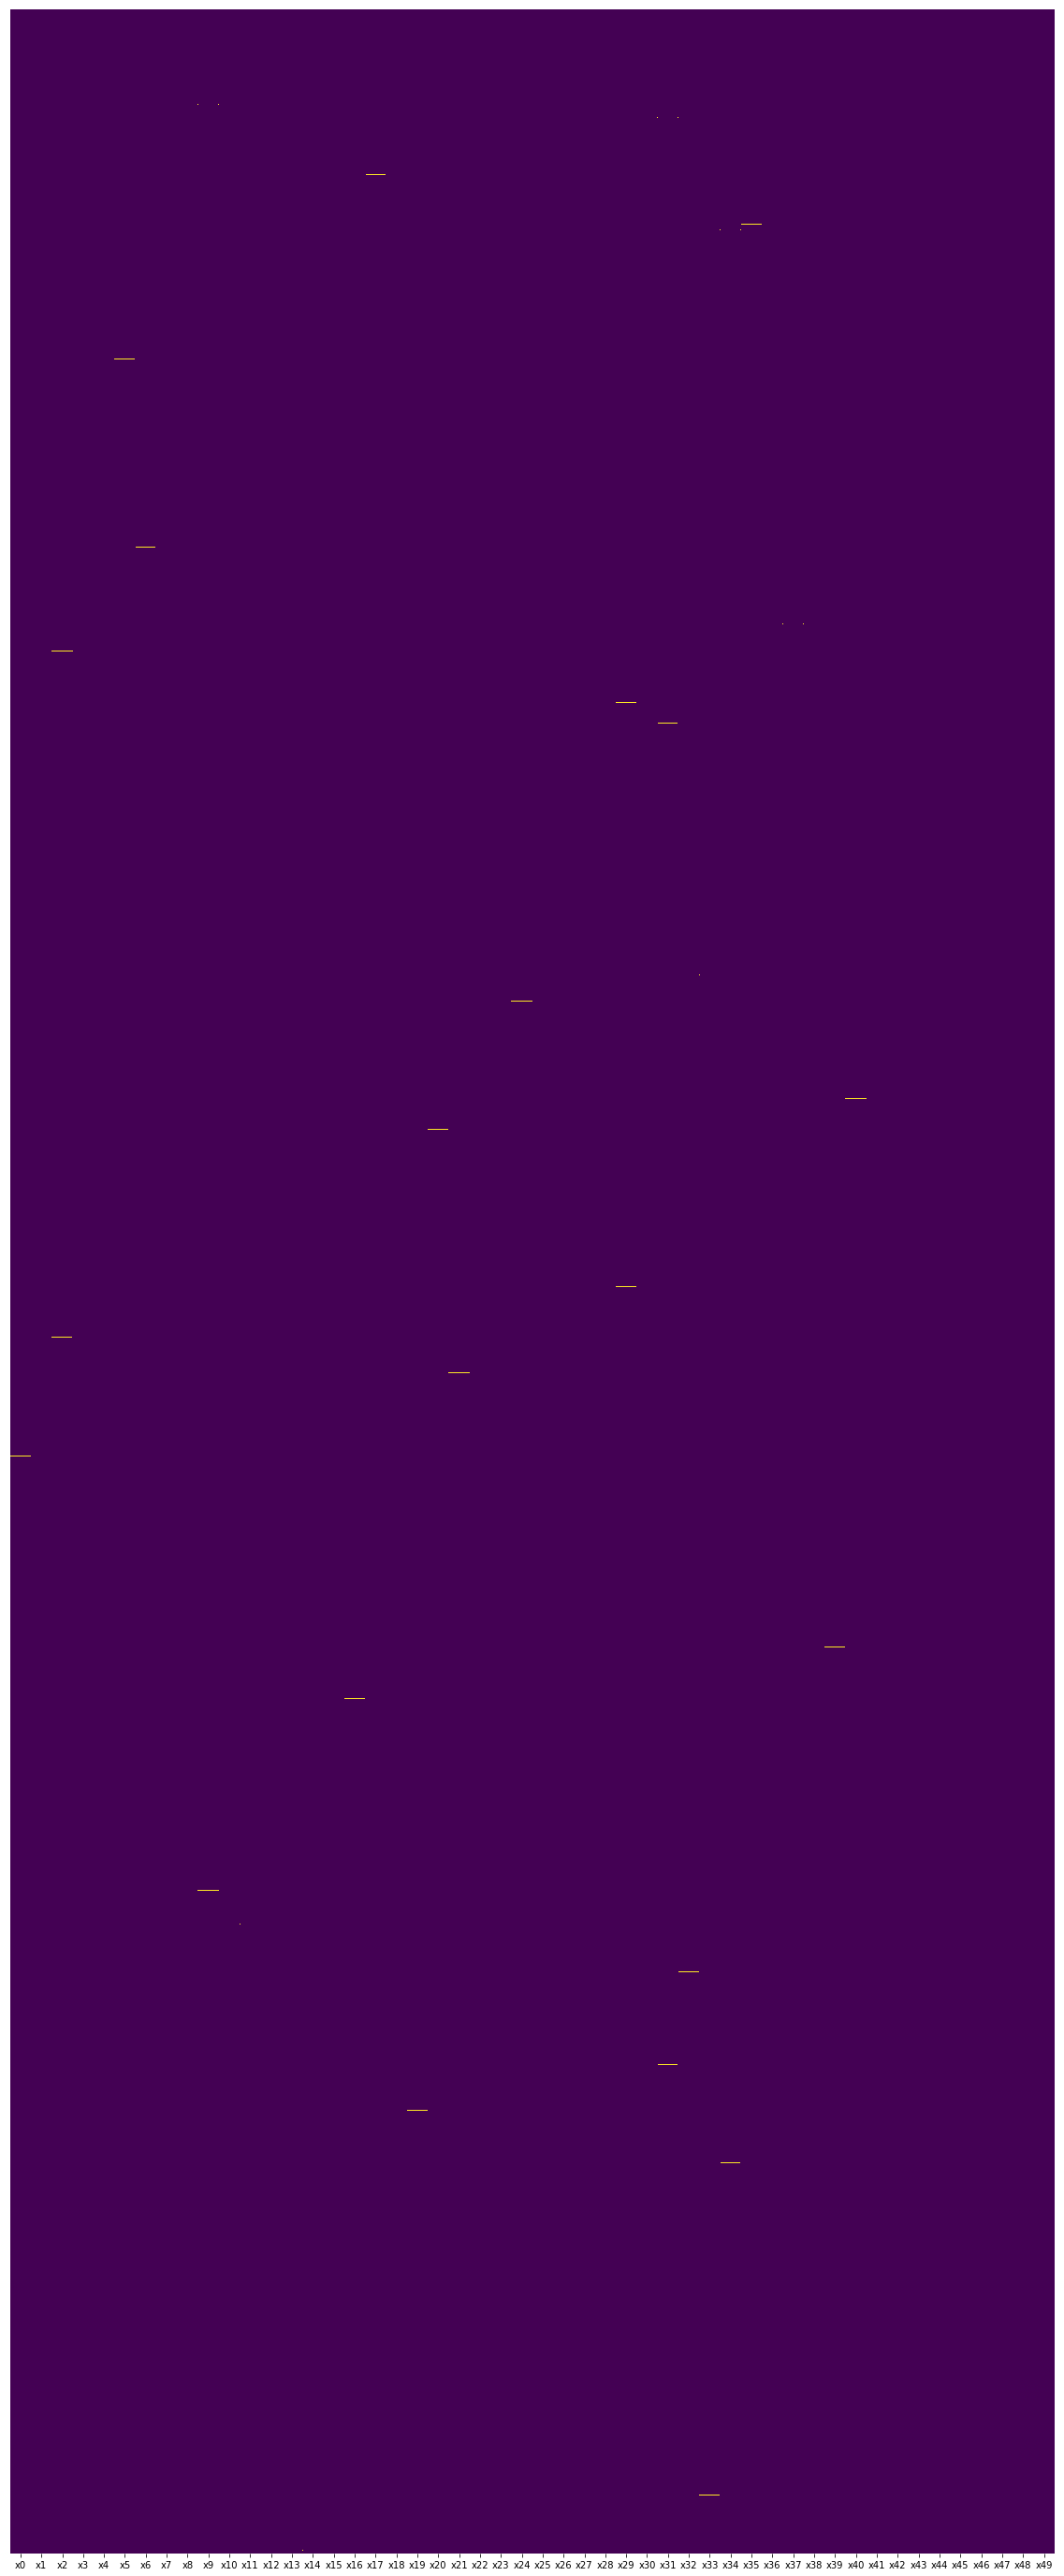

In [11]:
# Visualize null values vis heatmap

plt.figure(figsize=(20, 50))

sns.heatmap(final_proj_df.isnull(),cbar = False ,yticklabels = False, cmap ='viridis')

plt.show()


### Data Preparation

In [196]:
# Fill na values with best method

cln_final_proj_df= final_proj_df.fillna(final_proj_df.median())


In [197]:
# Check and count for Null and Not Null values in the dataset

for i in cln_final_proj_df.columns[:-1]:
    a = cln_final_proj_df[i].isnull().value_counts()
    if (len(a)==2):
        print(f'Null values in {i} is {a[1]}')
    else:
        print(f'Not Null values in {i} is {a[0]}')
    

Not Null values in x0 is 160000
Not Null values in x1 is 160000
Not Null values in x2 is 160000
Not Null values in x3 is 160000
Not Null values in x4 is 160000
Not Null values in x5 is 160000
Not Null values in x6 is 160000
Not Null values in x7 is 160000
Not Null values in x8 is 160000
Not Null values in x9 is 160000
Not Null values in x10 is 160000
Not Null values in x11 is 160000
Not Null values in x12 is 160000
Not Null values in x13 is 160000
Not Null values in x14 is 160000
Not Null values in x15 is 160000
Not Null values in x16 is 160000
Not Null values in x17 is 160000
Not Null values in x18 is 160000
Not Null values in x19 is 160000
Not Null values in x20 is 160000
Not Null values in x21 is 160000
Not Null values in x22 is 160000
Not Null values in x23 is 160000
Null values in x24 is 28
Not Null values in x25 is 160000
Not Null values in x26 is 160000
Not Null values in x27 is 160000
Not Null values in x28 is 160000
Null values in x29 is 30
Null values in x30 is 30
Not Null va

In [177]:
cln_final_proj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 50 columns):
x0     160000 non-null float64
x1     160000 non-null float64
x2     160000 non-null float64
x3     160000 non-null float64
x4     160000 non-null float64
x5     160000 non-null float64
x6     160000 non-null float64
x7     160000 non-null float64
x8     160000 non-null float64
x9     160000 non-null float64
x10    160000 non-null float64
x11    160000 non-null float64
x12    160000 non-null float64
x13    160000 non-null float64
x14    160000 non-null float64
x15    160000 non-null float64
x16    160000 non-null float64
x17    160000 non-null float64
x18    160000 non-null float64
x19    160000 non-null float64
x20    160000 non-null float64
x21    160000 non-null float64
x22    160000 non-null float64
x23    160000 non-null float64
x24    159972 non-null object
x25    160000 non-null float64
x26    160000 non-null float64
x27    160000 non-null float64
x28    160000 non-null

In [198]:
# Analyse the x24 variable

print(cln_final_proj_df['x24'].dtype)


object


In [199]:
cln_final_proj_df['x24'].value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [200]:
print(cln_final_proj_df['x32'].dtype)
print(cln_final_proj_df['x30'].dtype)
print(cln_final_proj_df['x29'].dtype)

object
object
object


In [201]:
cln_final_proj_df['x32'].value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [202]:
# Remove the '%' character from the x32 variable

cln_final_proj_df['x32'] = cln_final_proj_df['x32'].astype(str).map(lambda x: x.rstrip('%'))

In [203]:
cln_final_proj_df['x32'].value_counts()

0.01     40767
-0.01    34094
0.0      33923
-0.0     30492
-0.02     9924
0.02      7987
-0.03     1727
0.03       855
-0.04      138
0.04        55
nan         31
-0.05        6
0.05         1
Name: x32, dtype: int64

In [204]:
cln_final_proj_df['x32'] = cln_final_proj_df['x32'].astype(float)

In [205]:
cln_final_proj_df['x32'].value_counts()

 0.00    64415
 0.01    40767
-0.01    34094
-0.02     9924
 0.02     7987
-0.03     1727
 0.03      855
-0.04      138
 0.04       55
-0.05        6
 0.05        1
Name: x32, dtype: int64

In [206]:
cln_final_proj_df['x30'].value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

In [207]:
cln_final_proj_df['x29'].value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [208]:
# Analyse the x37 variable

cln_final_proj_df['x37'].head()

0     $1313.96
1     $1962.78
2      $430.47
3    $-2366.29
4     $-620.66
Name: x37, dtype: object

In [209]:
# Remove the '$' character from the x37 variable

cln_final_proj_df['x37'] = cln_final_proj_df['x37'].astype(str).map(lambda x: x.lstrip('$'))

In [210]:
#cln_final_proj_df['x37'] = cln_final_proj_df['x37'].map(lambda x: str(x)[1:])

In [211]:
# Convert the x37 variable to float type

cln_final_proj_df['x37'] = cln_final_proj_df['x37'].astype(float)

In [212]:
cln_final_proj_df['x37'].head(10)

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
5    -196.45
6    -241.04
7     621.35
8    -301.89
9    -484.09
Name: x37, dtype: float64

In [213]:
cln_final_proj_df= cln_final_proj_df.fillna(cln_final_proj_df.median())


In [214]:
col_names = cln_final_proj_df.columns

col_names

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'],
      dtype='object')

In [215]:
## One Hot Encoding of key Categorical Features

#cln_final_proj_df = pd.concat([cln_final_proj_df.drop('x24', axis=1), pd.get_dummies(cln_final_proj_df['x24'], prefix='x24', drop_first=1)], axis=1)
#cln_final_proj_df = pd.concat([cln_final_proj_df.drop('x29', axis=1), pd.get_dummies(cln_final_proj_df['x29'], prefix='x29', drop_first=1)], axis=1)
#cln_final_proj_df = pd.concat([cln_final_proj_df.drop('x30', axis=1), pd.get_dummies(cln_final_proj_df['x30'], prefix='x30', drop_first=1)], axis=1)
#cln_final_proj_df = pd.concat([cln_final_proj_df.drop('x32', axis=1), pd.get_dummies(cln_final_proj_df['x32'], prefix='x32', drop_first=1)], axis=1)
#cln_final_proj_df = pd.concat([cln_final_proj_df.drop('x37', axis=1), pd.get_dummies(cln_final_proj_df['x37'], prefix='x37', drop_first=1)], axis=1)


for c in col_names:
    if (cln_final_proj_df[c].dtype == 'object'):
        cln_final_proj_df = pd.concat([cln_final_proj_df.drop(c, axis=1), pd.get_dummies(cln_final_proj_df[c], prefix=c, drop_first=1)], axis=1)
        #cln_final_proj_df = pd.concat([cln_final_proj_df.drop(c, axis=1), pd.get_dummies(cln_final_proj_df[c], prefix=c)], axis=1)




In [216]:
final_df = cln_final_proj_df

In [217]:
final_df = final_df.reset_index(drop=True)

In [194]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 75 columns):
x0               160000 non-null float64
x1               160000 non-null float64
x2               160000 non-null float64
x3               160000 non-null float64
x4               160000 non-null float64
x5               160000 non-null float64
x6               160000 non-null float64
x7               160000 non-null float64
x8               160000 non-null float64
x9               160000 non-null float64
x10              160000 non-null float64
x11              160000 non-null float64
x12              160000 non-null float64
x13              160000 non-null float64
x14              160000 non-null float64
x15              160000 non-null float64
x16              160000 non-null float64
x17              160000 non-null float64
x18              160000 non-null float64
x19              160000 non-null float64
x20              160000 non-null float64
x21              160000 non-

In [218]:
final_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Jun,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0


In [219]:
X = final_df.iloc[:,:-1]
y = final_proj_df_temp.iloc[:,-1]

print(f'X Shape: {X.shape}')
print(f'y Shape: {y.shape}')

X Shape: (160000, 63)
y Shape: (160000,)


In [220]:
#final_df.to_csv("clean_data.csv")

#### Train Test Split for Model Training

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 655)

###  Logistic Regression

#### Hyper Parameter Tuning Using Grid Search - Logistic Regression

In [34]:
%%time

seed = 7
processors=3
num_folds=5
num_instances=len(X_train)
scoring='accuracy'

kfold = KFold(n_splits=num_folds, shuffle= True, random_state=seed)

CPU times: user 27 µs, sys: 8 µs, total: 35 µs
Wall time: 37.2 µs


In [35]:
%%time
param_grid = {'penalty': ['l1','l2'], 'C': [0.01, 0.1,1]} 


lr_grid = GridSearchCV( LogisticRegression(random_state=seed,class_weight='balanced'),param_grid,#refit=True,verbose=2,
                        cv = kfold, 
                        scoring = scoring, 
                        n_jobs = processors
                      )

lr_grid.fit(X_train, y_train)

print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.7117291666666666
{'C': 0.1, 'penalty': 'l1'}
CPU times: user 42.2 s, sys: 470 ms, total: 42.6 s
Wall time: 9min 10s


In [36]:
lr_model = LogisticRegression(C=0.1, penalty='l1')

#lr_model = lr_grid.best_params_

In [37]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#predictions = lr_model.predict_proba(X_test)[ : ,1]

predictions_lr = lr_model.predict(X_test)


##### Reports

In [39]:
#print(classification_report( y_test, (predictions>.000005).astype(int)))

print(classification_report( y_test, predictions_lr))

             precision    recall  f1-score   support

          0       0.71      0.83      0.77      9438
          1       0.69      0.52      0.59      6562

avg / total       0.70      0.71      0.70     16000



In [40]:
#print(confusion_matrix(y_test,(predictions>.0005).astype(int)))

print(confusion_matrix( y_test, predictions_lr))

[[7870 1568]
 [3145 3417]]


In [41]:
print('accuracy_score :',accuracy_score( y_test, predictions_lr))
print('roc_auc_score  :',roc_auc_score( y_test, predictions_lr))
print('log_loss       :',log_loss( y_test, predictions_lr))
print('recall_score   :',recall_score( y_test, predictions_lr))

accuracy_score : 0.7054375
roc_auc_score  : 0.6772942475957078
log_loss       : 10.173906682374035
recall_score   : 0.5207253886010362


### Random Forest

#### Random Forest Randomized Search

In [44]:
# Utility function to report the best "accuracy" scores
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

def report(results, n_top=500):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean Fit Time: {0:.3f} ".format(            
                  results['mean_fit_time'][candidate]))
            print("Mean validation accuracy score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [46]:
%%time
print(__doc__)

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2)

# build a classifier
clf = RandomForestClassifier(n_estimators=20)

# Random Forest Parameters
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring ='accuracy', cv=cv)

start = datetime.datetime.now()
random_search.fit(X_train, y_train)
#print("RandomizedSearchCV took %.2f seconds for %d candidates"
#      " parameter settings." % ((datetime.datetime.now() - start), n_iter_search))

print("RandomizedSearchCV  %d candidates"
      " parameter settings." %  n_iter_search)
      
report(random_search.cv_results_)

end = datetime.datetime.now()

elapsed = end - start

print("Total Randomized Search Training Time: {elapsed}")

Automatically created module for IPython interactive environment
RandomizedSearchCV  20 candidates parameter settings.
Model with rank: 1
Mean Fit Time: 31.536 
Mean validation accuracy score: 0.921 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}

Model with rank: 2
Mean Fit Time: 25.484 
Mean validation accuracy score: 0.916 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 8, 'min_samples_split': 10}

Model with rank: 3
Mean Fit Time: 20.153 
Mean validation accuracy score: 0.913 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 7}

Model with rank: 4
Mean Fit Time: 14.089 
Mean validation accuracy score: 0.903 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_

In [49]:
#rf_model = RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=-1,random_state=2)

rf_model = RandomForestClassifier(bootstrap =False, criterion= 'entropy', max_depth=None, max_features=10,min_samples_leaf= 5, min_samples_split=2)

In [50]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [51]:
predictions_rf = rf_model.predict(X_test)

##### Reports

In [52]:
#print(classification_report( y_test, (predictions>.000005).astype(int)))

print(classification_report( y_test, predictions_rf))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93      9438
          1       0.92      0.87      0.89      6562

avg / total       0.92      0.92      0.91     16000



In [53]:
#print(confusion_matrix(y_test,(predictions>.0005).astype(int)))

print(confusion_matrix( y_test, predictions_rf))

[[8938  500]
 [ 854 5708]]


In [54]:
print('accuracy_score :',accuracy_score( y_test, predictions_rf))
print('roc_auc_score  :',roc_auc_score( y_test, predictions_rf))
print('log_loss       :',log_loss( y_test, predictions_rf))
print('recall_score   :',recall_score( y_test, predictions_rf))

accuracy_score : 0.915375
roc_auc_score  : 0.9084397126429766
log_loss       : 2.9228689398390104
recall_score   : 0.8698567509905517


### Naïve Bayes

In [55]:
nb_model = GaussianNB()

In [56]:
nb_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [57]:
preditions_nb = nb_model.predict(X_test)

##### Reports

In [58]:
#print(classification_report( y_test, (predictions>.000005).astype(int)))

print(classification_report( y_test, preditions_nb))

             precision    recall  f1-score   support

          0       0.72      0.79      0.75      9438
          1       0.64      0.56      0.60      6562

avg / total       0.69      0.69      0.69     16000



In [59]:
#print(confusion_matrix(y_test,(predictions>.0005).astype(int)))

print(confusion_matrix( y_test, preditions_nb))

[[7413 2025]
 [2901 3661]]


In [60]:
print('accuracy_score :',accuracy_score( y_test, preditions_nb))
print('roc_auc_score  :',roc_auc_score( y_test, preditions_nb))
print('log_loss       :',log_loss( y_test, preditions_nb))
print('recall_score   :',recall_score( y_test, preditions_nb))

accuracy_score : 0.692125
roc_auc_score  : 0.6716755024643417
log_loss       : 10.633726981632886
recall_score   : 0.5579091740323072


### Boosted Trees

In [61]:
gb_model = GradientBoostingClassifier()

In [62]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [63]:
predictions_gb = gb_model.predict(X_test)

##### Reports

In [64]:
#print(classification_report( y_test, (predictions>.000005).astype(int)))

print(classification_report( y_test, predictions_gb))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      9438
          1       0.83      0.75      0.79      6562

avg / total       0.83      0.83      0.83     16000



In [65]:
#print(confusion_matrix(y_test,(predictions>.0005).astype(int)))

print(confusion_matrix( y_test, predictions_gb))

[[8443  995]
 [1672 4890]]


In [66]:
print('accuracy_score :',accuracy_score( y_test, predictions_gb))
print('roc_auc_score  :',roc_auc_score( y_test, predictions_gb))
print('log_loss       :',log_loss( y_test, predictions_gb))
print('recall_score   :',recall_score( y_test, predictions_gb))

accuracy_score : 0.8333125
roc_auc_score  : 0.8198873780528487
log_loss       : 5.757232015291865
recall_score   : 0.7451996342578482


### Deep Neural Net Model

In [99]:
X_train.shape

(144000, 73)

In [224]:
#Begin 
%time
start = datetime.datetime.now()

# Input Layer
model = Sequential()
model.add(Dense(230, input_dim=X_train.shape[1], kernel_initializer='RandomNormal')) 
#model.add(Activation('relu'))
model.add(PReLU())   # add an advanced activation
model.add(Dropout(0.30))

# Hidden Layers Starts here ...

# Best so far - PReLu with 3 layers of 150

# Hidden Layer 1
# For this existing layer neurons are changed to 100
model.add(Dense(230, kernel_initializer='RandomNormal'))
#model.add(Activation('relu'))
model.add(PReLU())   # add an advanced activation
model.add(Dropout(0.30))

# Hidden Layer 2
#This is a new layer with 125 neurons, relu activation and 10% dropout was removed
model.add(Dense(230, kernel_initializer='RandomNormal'))
#model.add(Activation('relu'))
model.add(PReLU())   # add an advanced activation
model.add(Dropout(0.30))

# Hidden Layer 3
#This is a new layer with 100 neurons, relu activation and 10% dropout was removed
model.add(Dense(230, kernel_initializer='RandomNormal'))
#model.add(Activation('relu'))
model.add(PReLU())   # add an advanced activation
model.add(Dropout(0.30))


# Hidden Layers Ends here ...

# Output Layer
model.add(Dense(1, kernel_initializer='RandomNormal')) 
model.add(Activation('sigmoid'))

# Model Summary
model.summary()

# Get elapsed time
end = datetime.datetime.now()

elapsed = end - start

#print('\n')
#print(f'Model Training Time - {elapsed}')
#print(f'Seconds-Microseconds : {elapsed.seconds}-{elapsed.microseconds}')


print(elapsed)
print(elapsed.seconds, ':',  elapsed.microseconds)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 230)               14720     
_________________________________________________________________
p_re_lu_27 (PReLU)           (None, 230)               230       
_________________________________________________________________
dropout_56 (Dropout)         (None, 230)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 230)               53130     
_________________________________________________________________
p_re_lu_28 (PReLU)           (None, 230)               230       
_________________________________________________________________
dropout_57 (Dropout)         (None, 230)               0         
_________________________________________________________________
dense_71 (De

In [225]:
%time
start = datetime.datetime.now()

nadam = Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, schedule_decay=0.004)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer= nadam)

model.fit(np.array(X_train), np.array(y_train), epochs=250, batch_size=250)

predictions_nn = model.predict(np.array(X_test))

#roc_auc_score(y_test,model.predict(X_test))
#end


# Get elapsed time
end = datetime.datetime.now()

elapsed = end - start

print('\n')
#print(f'Model Training Time - {elapsed}')
#print(f'Seconds : Microseconds {elapsed.seconds} :  {elapsed.microseconds}')
#print(f'Seconds : Microseconds ')

print(elapsed)
print(elapsed.seconds, ':',  elapsed.microseconds)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
Epoch 1/250
144000/144000 [==============================] - 6s - loss: 0.5764 - acc: 0.7084     
Epoch 2/250
144000/144000 [==============================] - 10s - loss: 0.3275 - acc: 0.8623    
Epoch 3/250
144000/144000 [==============================] - 5s - loss: 0.2612 - acc: 0.8962     
Epoch 4/250
144000/144000 [==============================] - 6s - loss: 0.2223 - acc: 0.9132     
Epoch 5/250
144000/144000 [==============================] - 5s - loss: 0.1987 - acc: 0.9241     
Epoch 6/250
144000/144000 [==============================] - 5s - loss: 0.1827 - acc: 0.9320     
Epoch 7/250
144000/144000 [==============================] - 5s - loss: 0.1708 - acc: 0.9373     
Epoch 8/250
144000/144000 [==============================] - 5s - loss: 0.1620 - acc: 0.9411     
Epoch 9/250
144000/144000 [==============================] - 5s - loss: 0.1545 - acc: 0.9448     
Epoch 10/250
144000/144000 [==========================

144000/144000 [==============================] - 180s - loss: 0.0770 - acc: 0.9773   
Epoch 165/250
144000/144000 [==============================] - 11s - loss: 0.0777 - acc: 0.9771    
Epoch 166/250
144000/144000 [==============================] - 12s - loss: 0.0775 - acc: 0.9771    
Epoch 167/250
144000/144000 [==============================] - 8s - loss: 0.0791 - acc: 0.9765     
Epoch 168/250
144000/144000 [==============================] - 8s - loss: 0.0784 - acc: 0.9765     
Epoch 169/250
144000/144000 [==============================] - 236s - loss: 0.0790 - acc: 0.9763   
Epoch 170/250
144000/144000 [==============================] - 6s - loss: 0.0772 - acc: 0.9768     
Epoch 171/250
144000/144000 [==============================] - 15s - loss: 0.0774 - acc: 0.9775    
Epoch 172/250
144000/144000 [==============================] - 6s - loss: 0.0783 - acc: 0.9771     
Epoch 173/250
144000/144000 [==============================] - 8s - loss: 0.0771 - acc: 0.9777     
Epoch 174/250


144000/144000 [==============================] - 5s - loss: 0.0736 - acc: 0.9784     
Epoch 247/250
144000/144000 [==============================] - 5s - loss: 0.0739 - acc: 0.9785     
Epoch 248/250
144000/144000 [==============================] - 5s - loss: 0.0730 - acc: 0.9787     
Epoch 249/250
144000/144000 [==============================] - 6s - loss: 0.0725 - acc: 0.9787     
Epoch 250/250
144000/144000 [==============================] - 6s - loss: 0.0726 - acc: 0.9788     


0:44:26.627039
2666 : 627039


In [226]:
predictions_nn = model.predict(np.array(X_test))

##### Reports

In [227]:
print(classification_report( y_test, (predictions_nn>.5).astype(int)))

#print(classification_report( np.array(y_test), predictions_nn))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      9639
          1       0.98      0.97      0.97      6361

avg / total       0.98      0.98      0.98     16000



In [228]:
#print(confusion_matrix(y_test,(predictions>.0005).astype(int)))

print(confusion_matrix( y_test, (predictions_nn>.5).astype(int)))

[[9505  134]
 [ 202 6159]]


In [229]:
print('accuracy_score :',accuracy_score(y_test, (predictions_nn>.5).astype(int)))
print('roc_auc_score  :',roc_auc_score(y_test, (predictions_nn>.5).astype(int)))
print('log_loss       :',log_loss(y_test, (predictions_nn>.5).astype(int)))
print('recall_score   :',recall_score(y_test, (predictions_nn>.5).astype(int)))

accuracy_score : 0.979
roc_auc_score  : 0.9771710648777086
log_loss       : 0.7253210009216031
recall_score   : 0.9682439867945292


In [132]:
#create a Skater explainer model

#models = InMemoryModel(model.predict_proba, examples = np.array(X_train))
models = InMemoryModel(model.predict, examples = np.array(X_train))

In [133]:
#set names as column names for plotting purposes.
names = X_train.columns

In [134]:
names.shape

(73,)

In [135]:
#models.target_names

range(0, 1)

[73/73] features ████████████████████ Time elapsed: 537 seconds

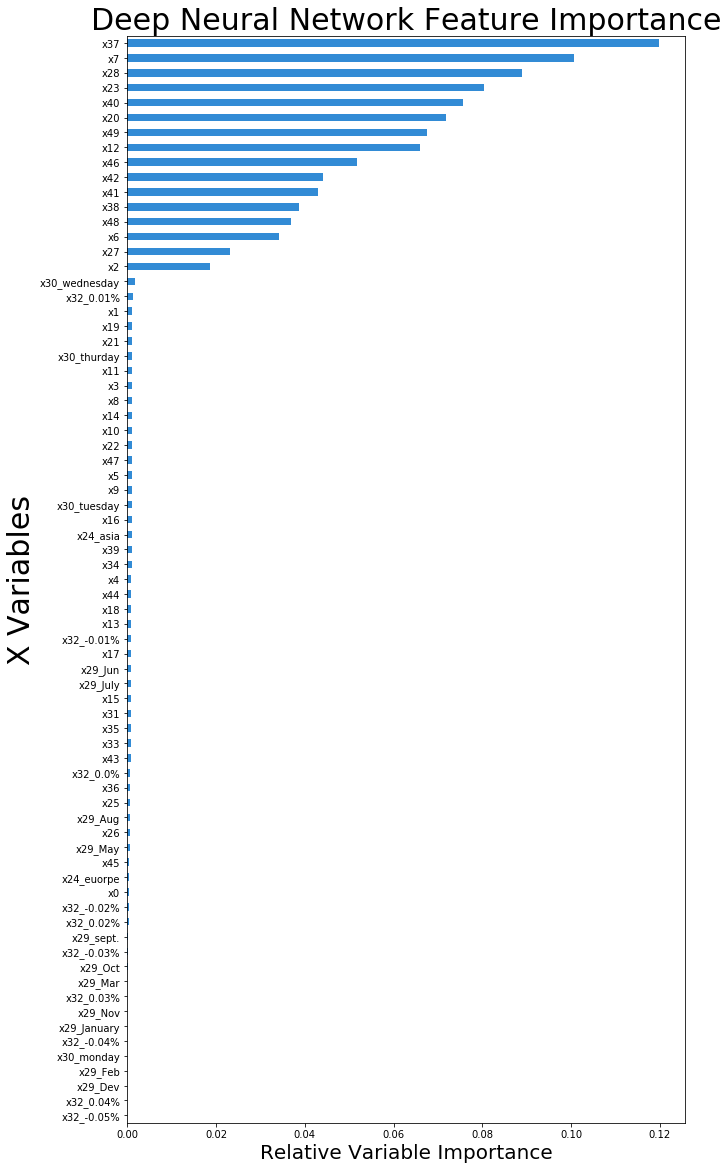

In [136]:
# using https://datascienceinc.github.io/Skater/reference/interpretation.html#interpretation-feature-importance
# using https://github.com/datascienceinc/Skater/blob/master/examples/sklearn-classifiers.ipynb

#interpret the model.
interpreter = Interpretation()
interpreter.load_data(np.array(X_train), feature_names=names)

#Get feature importance coefficients
#interpreter.feature_importance.feature_importance(models)

#set the figure size for the axes
f, axes = plt.subplots(1,1, figsize = (10, 20))

#set the title and label information
ax = axes
interpreter.feature_importance.plot_feature_importance(models, ax=ax, ascending = False)
ax.set_title('Deep Neural Network Feature Importance', fontsize=30)
ax.set_xlabel('Relative Variable Importance', fontsize=20)
ax.set_ylabel('X Variables', fontsize=20)
ax.set_xlabel('Relative Variable Importance', fontsize=20)
ax.set_ylabel('X Variables', fontsize=30)
ax.tick_params(axis='both',labelsize=10)


[900/900] grid cells ████████████████████ Time elapsed: 60 seconds

[[<Figure size 1152x720 with 2 Axes>,

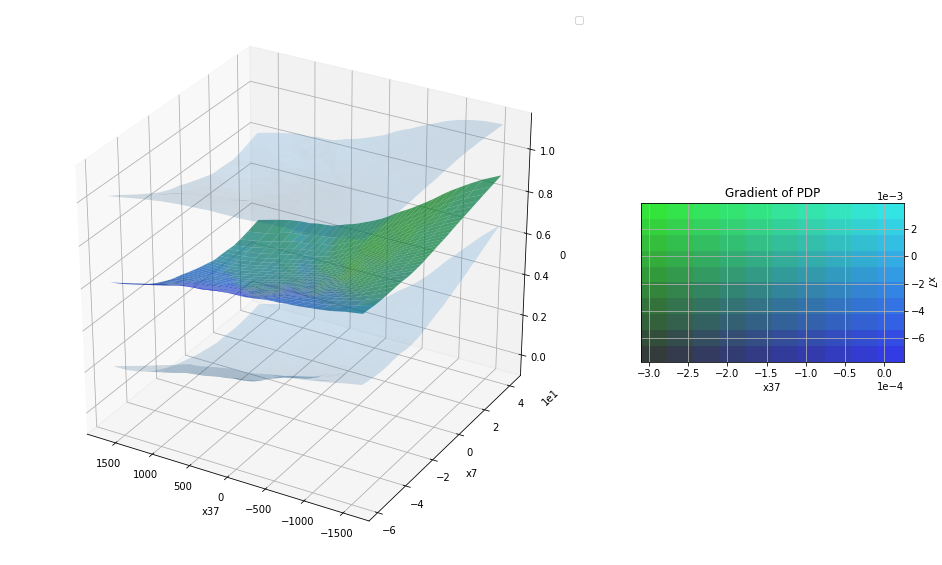

In [137]:
#combined partial dependency plot (PDP) of x37 and x7 effects on probability of predicting 0.

interpreter.partial_dependence.plot_partial_dependence([('x37','x7')], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

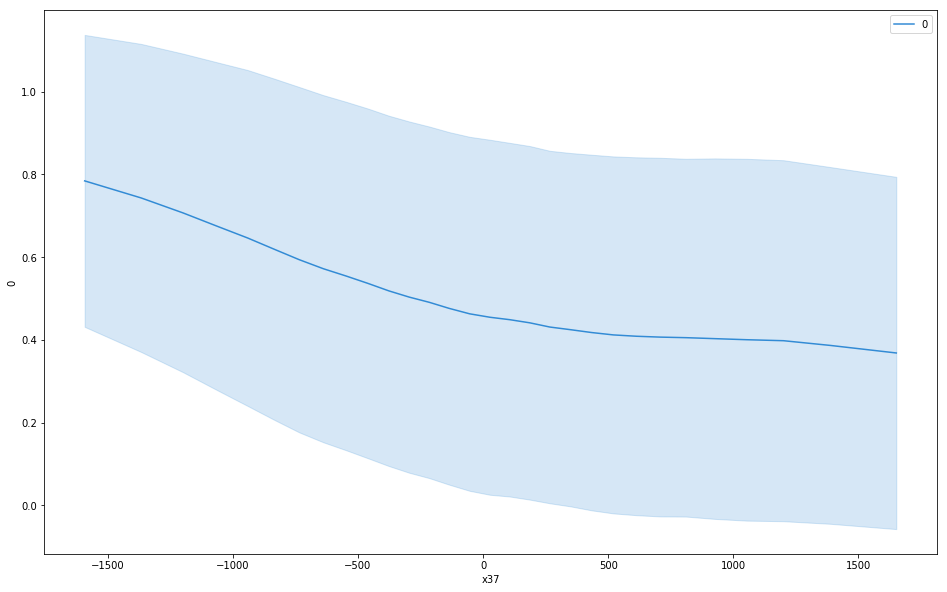

In [138]:
#PDP that shows the probability of predicting 0 given the value of x37. 
#Please note that these values are within 2 standard deviations from the mean of x37.
interpreter.partial_dependence.plot_partial_dependence(['x37'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

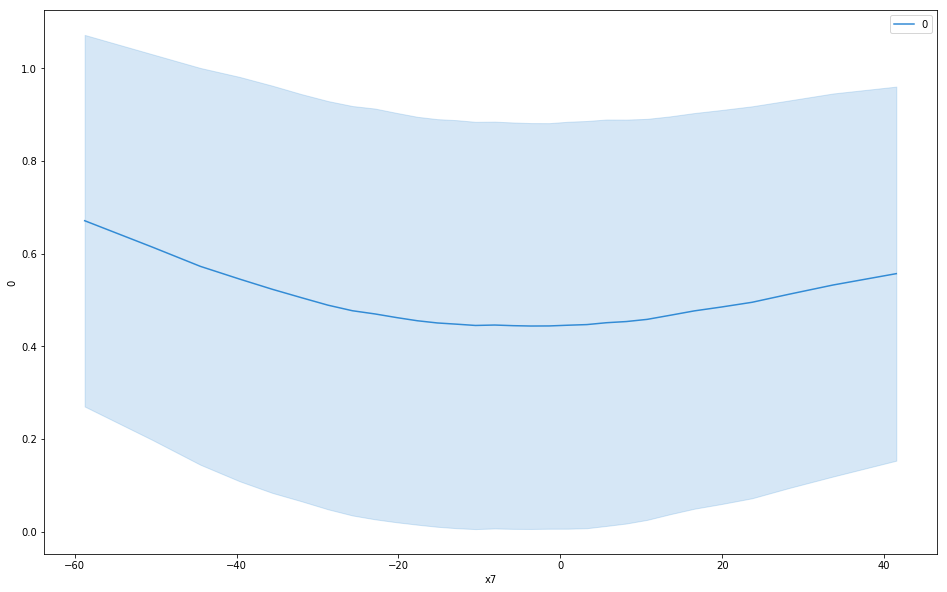

In [139]:
#PDP that shows the probability of predicting 0 given the value of x7. 
#Please note that these values are within 2 standard deviations from the mean of x7.
interpreter.partial_dependence.plot_partial_dependence(['x7'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

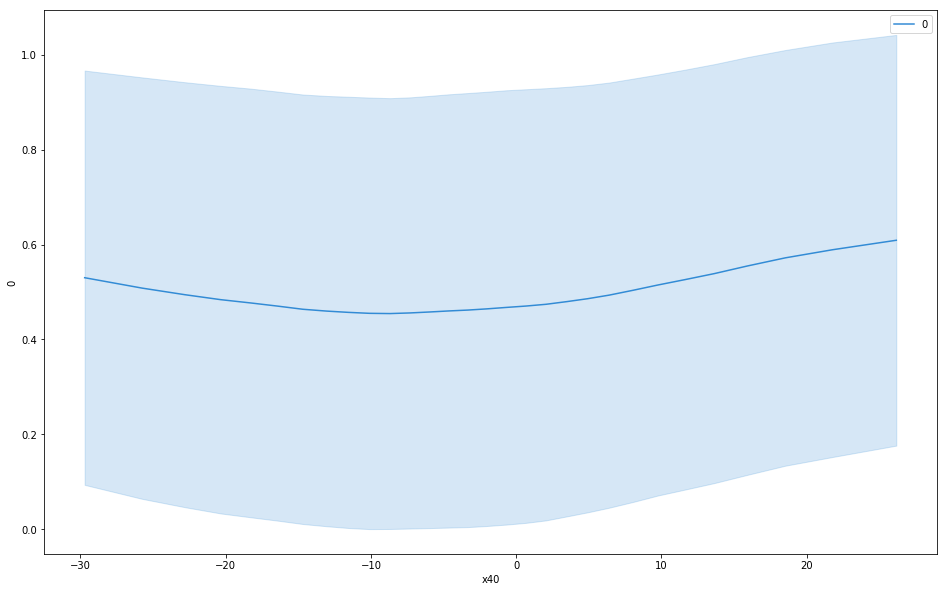

In [140]:
#PDP that shows the probability of predicting 0 given the value of x40. 
#Please note that these values are within 2 standard deviations from the mean of x40.
interpreter.partial_dependence.plot_partial_dependence(['x40'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[100/100] grid cells ████████████████████ Time elapsed: 5 seconds

[[<Figure size 1152x720 with 1 Axes>,

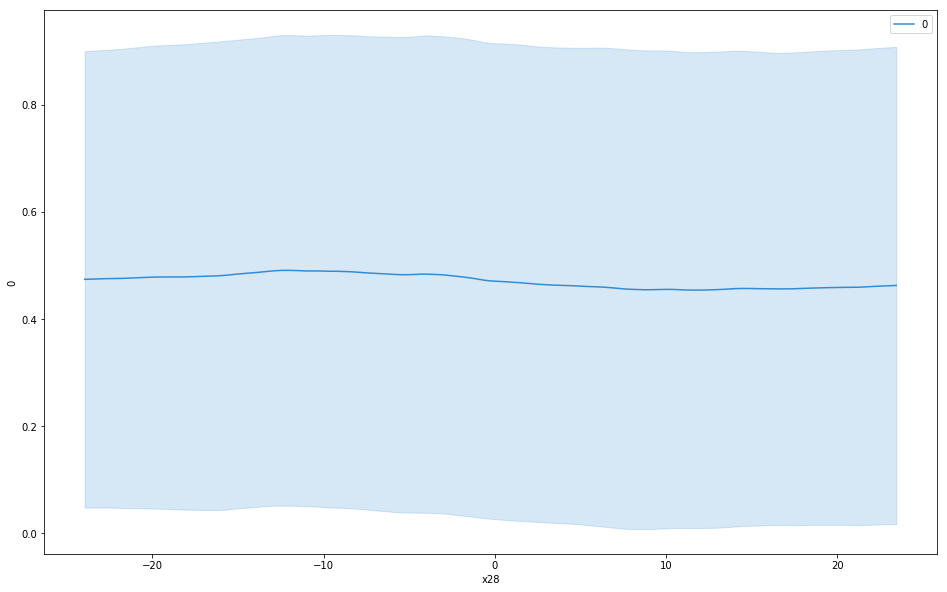

In [141]:
#PDP that shows the probability of predicting 0 given the value of x28. 
#Please note that these values are within 2 standard deviations from the mean of x28.
interpreter.partial_dependence.plot_partial_dependence(['x28'], models, 
                                                       grid_resolution=100,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

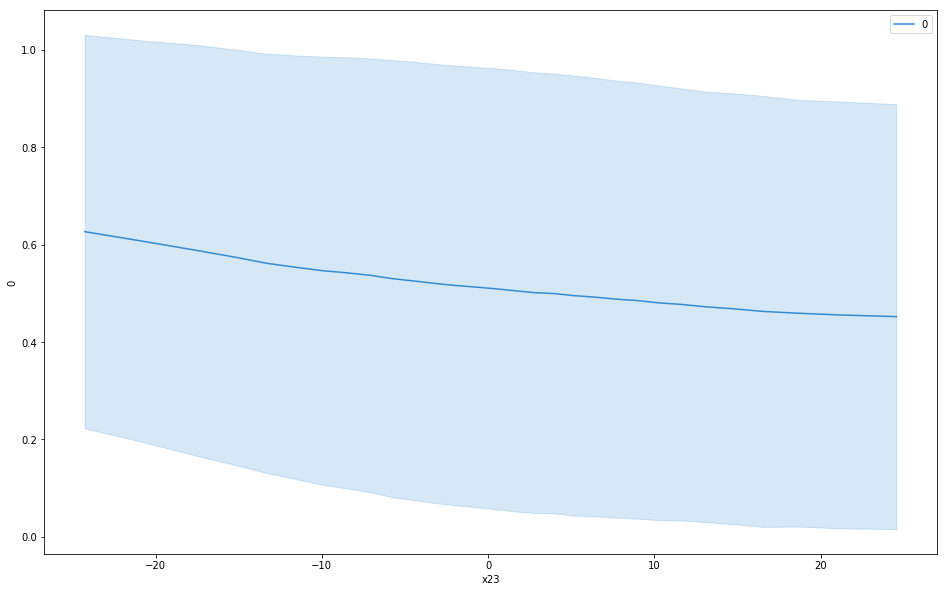

In [142]:
#PDP that shows the probability of predicting 0 given the value of x23. 
#Please note that these values are within 2 standard deviations from the mean of x23.
interpreter.partial_dependence.plot_partial_dependence(['x23'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

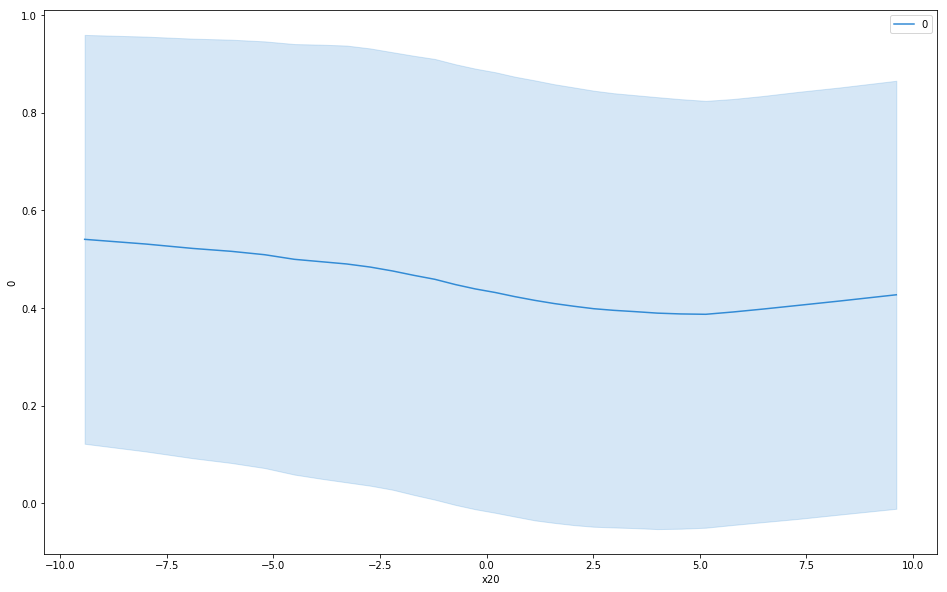

In [143]:
#PDP that shows the probability of predicting 0 given the value of x20. 
#Please note that these values are within 2 standard deviations from the mean of x20.
interpreter.partial_dependence.plot_partial_dependence(['x20'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

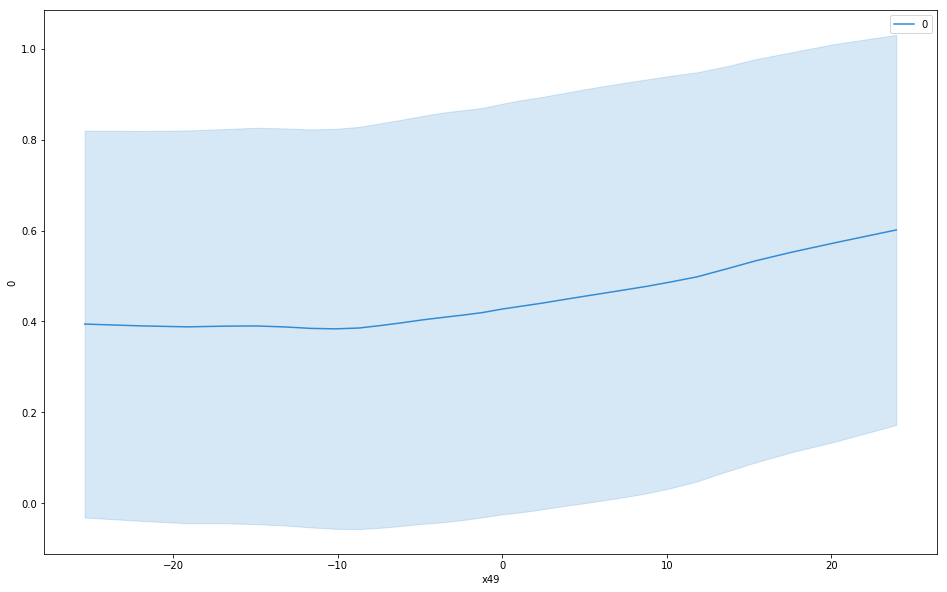

In [144]:
#PDP that shows the probability of predicting 0 given the value of x49. 
#Please note that these values are within 2 standard deviations from the mean of x49.
interpreter.partial_dependence.plot_partial_dependence(['x49'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

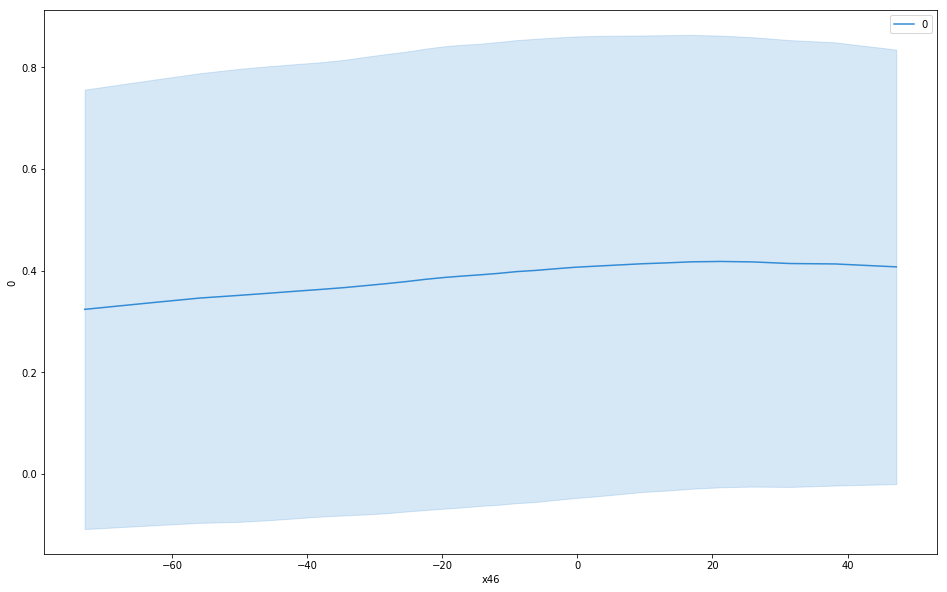

In [145]:
#PDP that shows the probability of predicting 0 given the value of x46. 
#Please note that these values are within 2 standard deviations from the mean of x46.
interpreter.partial_dependence.plot_partial_dependence(['x46'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

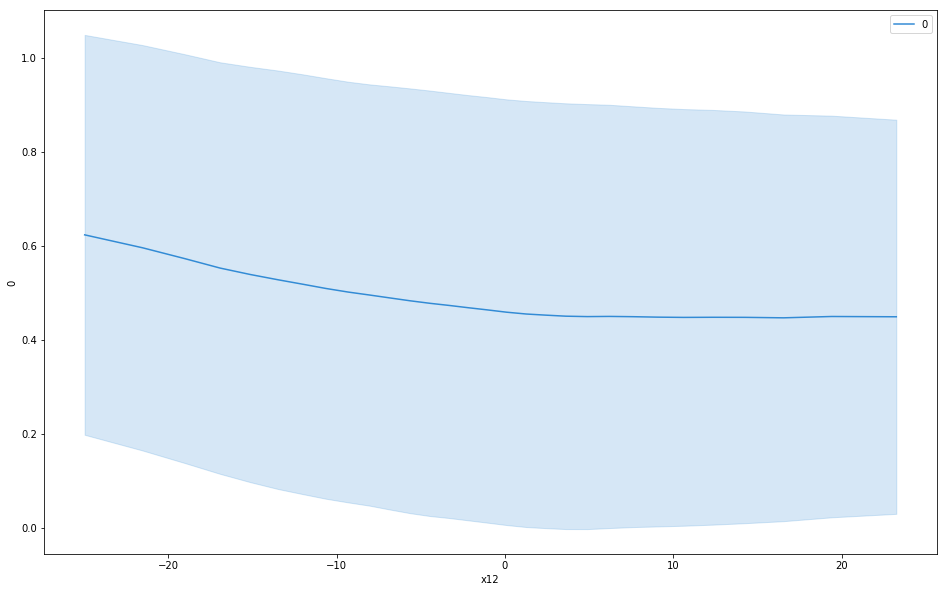

In [146]:
#PDP that shows the probability of predicting 0 given the value of x12. 
#Please note that these values are within 2 standard deviations from the mean of x12.

interpreter.partial_dependence.plot_partial_dependence(['x12'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

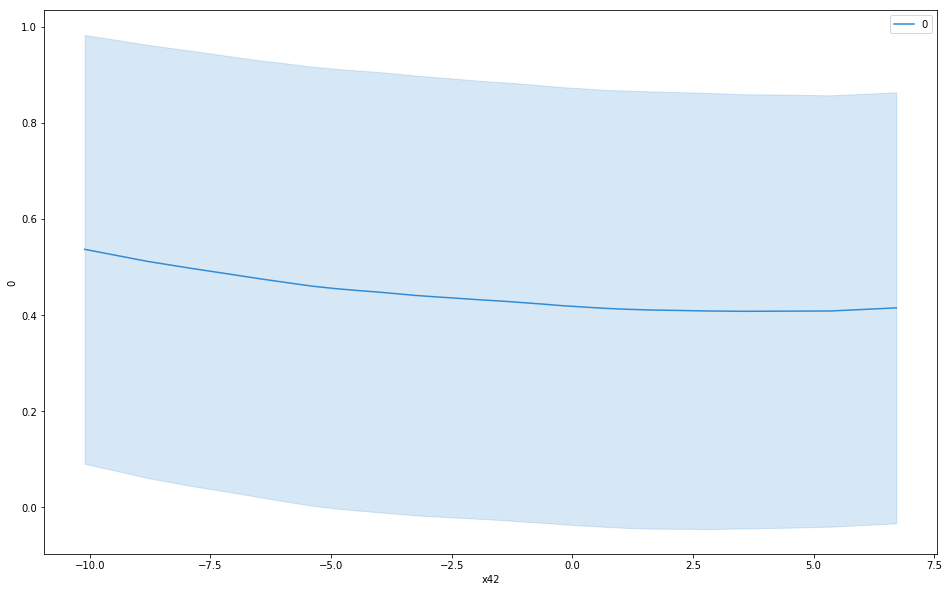

In [147]:
#PDP that shows the probability of predicting 0 given the value of x42. 
#Please note that these values are within 2 standard deviations from the mean of x42.
interpreter.partial_dependence.plot_partial_dependence(['x42'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

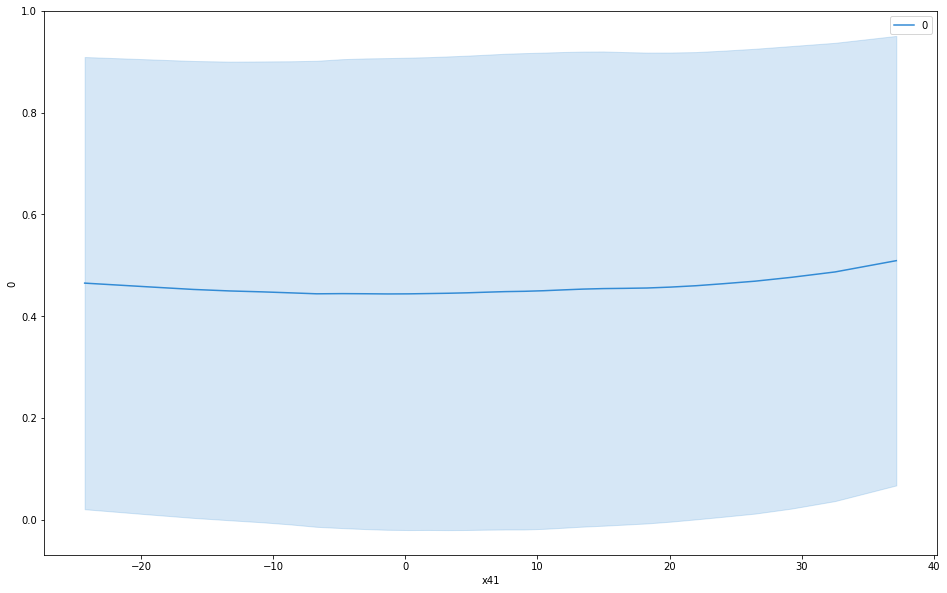

In [148]:
#PDP that shows the probability of predicting 0 given the value of x41. 
#Please note that these values are within 2 standard deviations from the mean of x41.
interpreter.partial_dependence.plot_partial_dependence(['x41'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

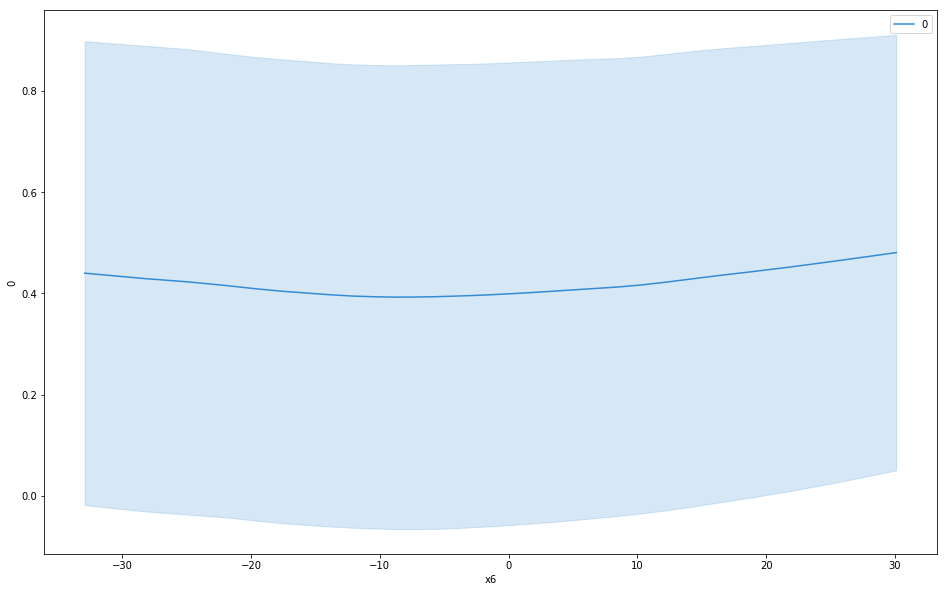

In [149]:
#PDP that shows the probability of predicting 0 given the value of x6. 
#Please note that these values are within 2 standard deviations from the mean of x6.
interpreter.partial_dependence.plot_partial_dependence(['x6'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

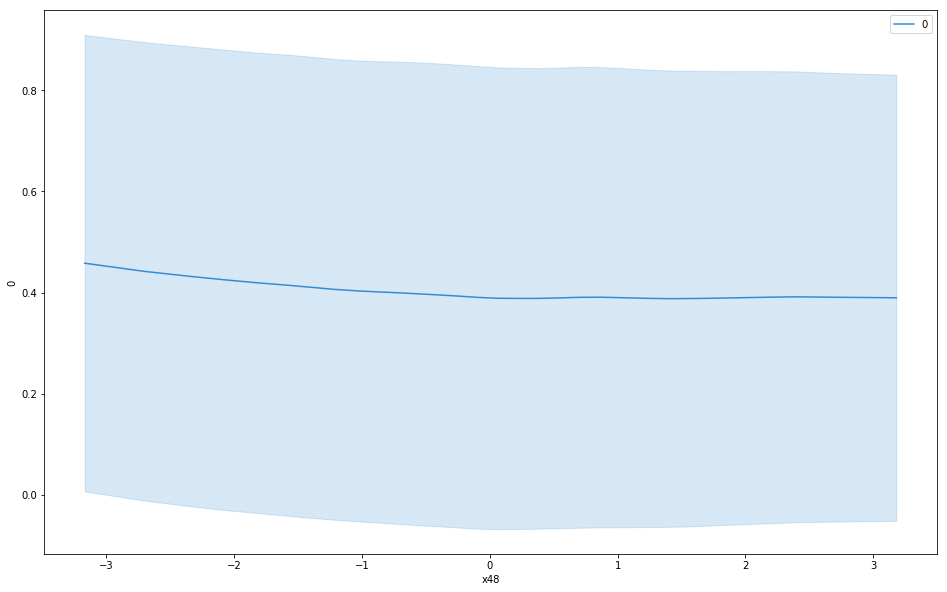

In [150]:
#PDP that shows the probability of predicting 0 given the value of x48. 
#Please note that these values are within 2 standard deviations from the mean of x48.
interpreter.partial_dependence.plot_partial_dependence(['x48'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

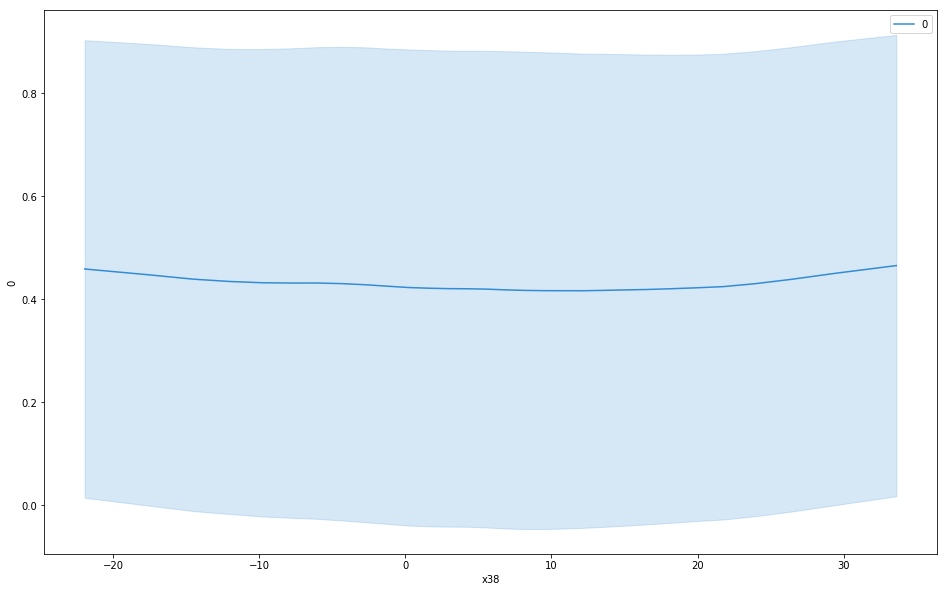

In [151]:
#PDP that shows the probability of predicting 0 given the value of x38. 
#Please note that these values are within 2 standard deviations from the mean of x38.
interpreter.partial_dependence.plot_partial_dependence(['x38'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

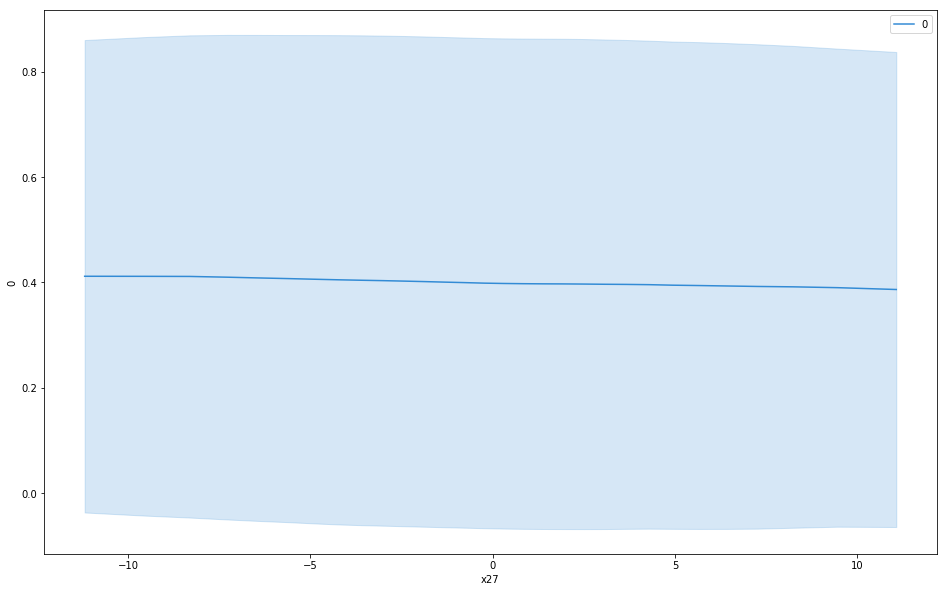

In [152]:
#PDP that shows the probability of predicting 0 given the value of x27. 
#Please note that these values are within 2 standard deviations from the mean of x27.
interpreter.partial_dependence.plot_partial_dependence(['x27'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)

[30/30] grid cells ████████████████████ Time elapsed: 1 seconds

[[<Figure size 1152x720 with 1 Axes>,

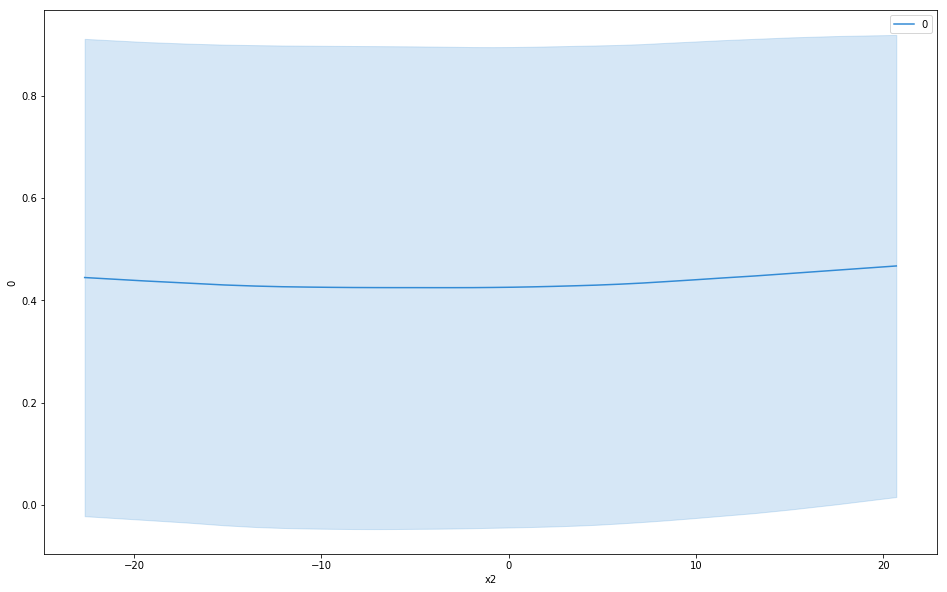

In [153]:
#PDP that shows the probability of predicting 0 given the value of x2. 
#Please note that these values are within 2 standard deviations from the mean of x2.
interpreter.partial_dependence.plot_partial_dependence(['x2'], models, 
                                                       grid_resolution=30,
                                                       with_variance=True)